In [33]:
## Homework #1 
#How can you remove duplicate values in a dataset in Python?
import numpy as np
#if input is an array
a=[1,2,3,4,9,9,5,2]
my_array=np.array(a)
print ("original array")
print (a)
a_unique = np.unique(a)
print ("remove duplicate")
print (a_unique)
#if input is a table
import pandas as pd
df=pd.DataFrame({'H1':[1,2,3,2],'H2':[4,5,5,5],'H3':[7,8,9,8],'H4':[4,5,5,5]})
print ("original table")
print(df)
#drop duplicate rows
df=df.drop_duplicates(['H1', 'H2','H3','H4'])
print ("remove duplicate rows")
print(df)
#drop duplicate columns based on column content
#do not know the solution???


original array
[1, 2, 3, 4, 9, 9, 5, 2]
remove duplicate
[1 2 3 4 5 9]
original table
   H1  H2  H3  H4
0   1   4   7   4
1   2   5   8   5
2   3   5   9   5
3   2   5   8   5
remove duplicate rows
   H1  H2  H3  H4
0   1   4   7   4
1   2   5   8   5
2   3   5   9   5


In [34]:
## Homework #2
#You are given two tables - friend_request and request_accepted.
#Friend_request contains requester_id, time and sent_to_id and
#request_accepted table contains time, acceptor_id and
#requestor_id. How will you determine the overall acceptance rate
#of requests?
#Write in both Python and SQL.

#Ans:

#Assumption: 
#    a)The pair of acceptor_id and requestor_id in request_accepted table always pre-exist in friend_request table.
#    b)Both tables are not empty.
# SQL: 
#select bb.accept_num / aa.total as accept_rate from
#(select count(*) as total from (select distinct requester_id, sent_to_id from friend_request) a) aa,
#(select count(*) as accept_num from (distinct acceptor_id, requestor_id from request_accepted) b) bb

#python
import pandas as pd
friend_request=pd.read_csv('friend_request.csv')
request_accepted=pd.read_csv('request_accepted.csv')
friend_request=friend_request.drop_duplicates(['requester_id','sent_to_id'])
request_accepted=request_accepted.drop_duplicates(['acceptor_id','requestor_id'])
acceptance_rate=num(request_accepted.count())/num(friend_request.count())



In [67]:
##Homework #3
#Now write Python scripts to identify the issuer of the following credit card numbers
import pandas as pd
df=pd.DataFrame({'card_number':['4175004175004172','4917491749174917','346416800707698','376416800707698','37641680070769832112','36641680070769','54545641680070769' ] })
df['issuer']=''
print(df) 
for i in range(0, len(df['card_number'])):
    if df['card_number'][i].startswith('4') and len(df['card_number'][i])==16 :
        df['issuer'][i]='VISA'
    elif (df['card_number'][i].startswith('34') or df['card_number'][i].startswith('37')) and len(df['card_number'][i])==15 :
        df['issuer'][i]='AMEX'
    elif df['card_number'][i].startswith('36') and len(df['card_number'][i])==14:
        df['issuer'][i]='Diners Club'
    elif (df['card_number'][i].startswith('4026') or df['card_number'][i].startswith('417500') or df['card_number'][i].startswith('4405') or df['card_number'][i].startswith('4508') or df['card_number'][i].startswith('4844') or df['card_number'][i].startswith('4913') or df['card_number'][i].startswith('4917')) and len(df['card_number'][i])==16 : 
        df['issuer'][i]='VISAELECTRON'
    else:
        df['issuer'][i]='Unknown'
print(df)                               
                                
                                
                                

            card_number issuer
0      4175004175004172       
1      4917491749174917       
2       346416800707698       
3       376416800707698       
4  37641680070769832112       
5        36641680070769       
6     54545641680070769       
            card_number       issuer
0      4175004175004172         VISA
1      4917491749174917         VISA
2       346416800707698         AMEX
3       376416800707698         AMEX
4  37641680070769832112      Unknown
5        36641680070769  Diners Club
6     54545641680070769      Unknown


In [157]:
##Homework #4
#PrintCumulativeTimeSeries()
#Three parameters: experiment_id, country, and vertical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/Users/siqifan/anaconda3/siqi_python_folder/BA501_python_data.csv')
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')
df=df.sort_values('date',ascending=True, inplace=False)
df.head(5)


,country,date,experiment_id,order_id,spend_usd,user_id,vertical
20626,JP,2017-04-01,12624549,14501424706754266227,2.151847,17881412854202596798,ANDROID_APPS
9582,IT,2017-04-01,12624549,14234923170739343699,1.056582,8630776028280626032,ANDROID_APPS
9583,IT,2017-04-01,12624549,10595643036881346744,7.460112,8630776028280626032,MUSIC
49365,JP,2017-04-01,12624548,14654879119454326109,3.586412,14041929980919583133,ANDROID_APPS
9585,IT,2017-04-01,12624549,3662077915915815113,1.056582,8630776028280626032,ANDROID_APPS


In [77]:
### parameters: experiment_id
np.unique(df['experiment_id'])

array([12624548, 12624549])

In [116]:
red_id=np.unique(df['experiment_id'])[0]
blue_id=np.unique(df['experiment_id'])[1]
red_data=df[['date','spend_usd','country','vertical']][(df.experiment_id==red_id)]
blue_data=df[['date','spend_usd','country','vertical']][(df.experiment_id==blue_id)]
red_series=red_data.groupby('date')['spend_usd'].sum().cumsum()
blue_series=blue_data.groupby('date')['spend_usd'].sum().cumsum()
index_series=red_series.index
print(red_series)

date
2017-04-01     84017.341822
2017-04-02    137448.866601
2017-04-03    190557.548939
2017-04-04    236190.035518
2017-04-05    287575.193811
2017-04-06    334991.572625
2017-04-07    397069.860459
Name: spend_usd, dtype: float64


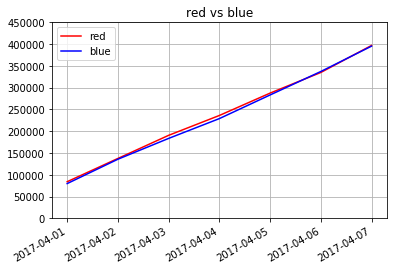

In [121]:
df2=pd.DataFrame({'experiment':red_series.tolist(),'control':blue_series.tolist()}, index=index_series.tolist())
fig,ax=plt.subplots()
ax.plot(df2.experiment, color='red',label='red')
ax.plot(df2.control, color='blue',label='blue')
ax.set_ylim(0,450000)
ax.set_title('red vs blue')
ax.grid(True, which='both')
ax.legend().get_texts()[0].set_text('red')
ax.legend().get_texts()[1].set_text('blue')
plt.gcf().autofmt_xdate()

In [149]:
### parameters: country
country=df.groupby('country')['spend_usd'].sum().reset_index(name ='total')
country=country.sort_values(['total'],ascending=[False])
print(country)
#pick top three spend - countries based on the output: JP, US, KR

   country          total
27      JP  241406.864175
52      US  234252.713573
28      KR  131706.979622
9       DE   31491.686018
16      GB   22644.965632
15      FR   21180.562013
3       AU   15877.633679
6       CA   12951.332762
18      HK   10188.606958
26      IT    9360.671022
5       BR    7226.139306
13      ES    6280.247879
21      ID    5480.962275
46      SG    4706.505418
33      NL    4226.217002
49      TR    3909.707246
2       AT    3759.115467
7       CH    3549.431644
4       BE    2789.523098
45      SE    2634.859729
38      PL    2555.709180
54      ZA    2402.150305
24      IN    2393.356750
35      NZ    1871.535585
34      NO    1842.916416
14      FI    1458.194388
10      DK    1358.179783
22      IE    1160.637553
17      GR     803.236874
40      PT     604.500019
44      SA      63.867151
31      MX      52.039831
51      UA      43.914211
48      TH      40.363124
43      RU      26.615652
42      RS      19.990000
50      TW      16.797751
1       AR  

In [ ]:
#series_jp=df['spend_usd'][(df.country=='JP')]
#series_us=df['spend_usd'][(df.country=='US')]
#fig,ax=plt.subplots(ncols=2,sharex=True, sharey=True)
#ax[0].hist(series_jp, bins=15)
#ax[1].hist(series_us, bins=15)
#ax[0].set_title('jp')
#ax[1].set_title('us')
#ax[0].set_ylabel('total order')
#ax[0].set_xlabel('spend')
#ax[1].set_ylabel('spend')

In [153]:
jp_data=df[['date','spend_usd']][(df.country=='JP')]
us_data=df[['date','spend_usd']][(df.country=='US')]
kr_data=df[['date','spend_usd']][(df.country=='KR')]
jp_series=jp_data.groupby('date')['spend_usd'].sum().cumsum()
us_series=us_data.groupby('date')['spend_usd'].sum().cumsum()
kr_series=kr_data.groupby('date')['spend_usd'].sum().cumsum()
index_series=jp_series.index
print(jp_series)


date
2017-04-01     70321.087334
2017-04-02    103709.591803
2017-04-03    135159.325630
2017-04-04    157726.015119
2017-04-05    191639.349200
2017-04-06    213042.856390
2017-04-07    241406.864175
Name: spend_usd, dtype: float64


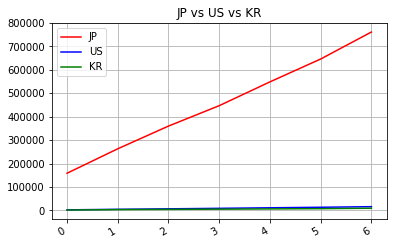

In [156]:
df4=pd.DataFrame({'experiment':jp_series.tolist(),'control1':us_series.tolist(),'control2':kr_series.tolist()})
fig,ax=plt.subplots()
ax.plot(df3.experiment, color='red', label='JP')
ax.plot(df3.control1, color='blue',label='US')
ax.plot(df3.control2, color='green',label='KR')
#ax.set_ylim(0,)
ax.set_title('JP vs US vs KR')
ax.grid(True, which='both')
ax.legend().get_texts()[0].set_text('JP')
ax.legend().get_texts()[1].set_text('US')
ax.legend().get_texts()[2].set_text('KR')    
plt.gcf().autofmt_xdate()



In [76]:
### parameters: vertical
np.unique(df['vertical'])

array(['ANDROID_APPS', 'COMMERCE', 'MAGAZINES', 'MULTI_CONTAINER',
       'MUSIC', 'OCEAN', 'YOUTUBE'], dtype=object)

In [124]:
vert=df.groupby('vertical')['spend_usd'].sum()
#pick top three spend - verticals based on the output: android, music, youtube
print(vert)

vertical
ANDROID_APPS       761747.706265
COMMERCE              165.000000
MAGAZINES             123.193424
MULTI_CONTAINER       645.000000
MUSIC               16084.391884
OCEAN                4449.726206
YOUTUBE              9342.626830
Name: spend_usd, dtype: float64


In [139]:
android_data=df[['date','spend_usd']][(df.vertical=='ANDROID_APPS')]
music_data=df[['date','spend_usd']][(df.vertical=='MUSIC')]
youtube_data=df[['date','spend_usd']][(df.vertical=='YOUTUBE')]
android_series=android_data.groupby('date')['spend_usd'].sum().cumsum()
music_series=music_data.groupby('date')['spend_usd'].sum().cumsum()
youtube_series=youtube_data.groupby('date')['spend_usd'].sum().cumsum()
index_series=android_series.index
print(android_series)

date
2017-04-01    158787.659360
2017-04-02    263209.059821
2017-04-03    360165.602450
2017-04-04    447294.765113
2017-04-05    548918.430988
2017-04-06    646466.109136
2017-04-07    761747.706265
Name: spend_usd, dtype: float64


In [140]:
print(music_series)

date
2017-04-01     2532.005976
2017-04-02     4745.363449
2017-04-03     6883.734303
2017-04-04     8990.826989
2017-04-05    11339.529132
2017-04-06    13533.499763
2017-04-07    16084.391884
Name: spend_usd, dtype: float64


In [142]:
print(youtube_series)

date
2017-04-01    1649.886679
2017-04-02    3585.862291
2017-04-03    4411.126974
2017-04-04    5465.710507
2017-04-05    6527.217174
2017-04-06    7573.661238
2017-04-07    9342.626830
Name: spend_usd, dtype: float64


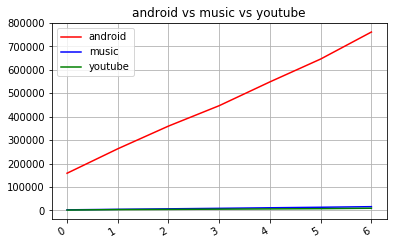

In [138]:
df3=pd.DataFrame({'experiment':android_series.tolist(),'control1':music_series.tolist(),'control2':youtube_series.tolist()})
fig,ax=plt.subplots()
ax.plot(df3.experiment, color='red',label='android')
ax.plot(df3.control1, color='blue',label='music')
ax.plot(df3.control2, color='green',label='youtube')
#ax_set_ylim(0,)
ax.set_title('android vs music vs youtube')
ax.grid(True, which='both')
ax.legend().get_texts()[0].set_text('android')
ax.legend().get_texts()[1].set_text('music')
ax.legend().get_texts()[2].set_text('youtube')
plt.gcf().autofmt_xdate()

